__Цель:__ Повысить вовлеченность пользователей и, как следствие, увеличить конверсию на сайте.

__Гипотеза:__ Внедрение нового дизайна сайта (черный фон) приведет к статистически значимому увеличению коэффициента конверсии по сравнению с текущим дизайном (белый фон). Предпологается, что новый черный дизайн сайта улучшит читаемость контента и создаст более премиальный вид.


__Задача__: Для проверки гипотезы проведем A/B-тестирование и сравним следующие ключевые метрики между группой A (контрольная группа, старый дизайн) и группой B (тестовая группа, новый дизайн):
- Коэффициент конверсии.
- Среднее время, проведенное пользователями на сайте.
- Среднее количество просмотренных страниц.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

сохраним данные в переменную df

In [6]:
df = pd.read_csv('C:\\Users\\a17c2\\Downloads\\data_set\\ab_testing.csv')

In [7]:
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


В дата фрейме нету пропущенных значений 

__Time spent__ (время проведенное на сайте)

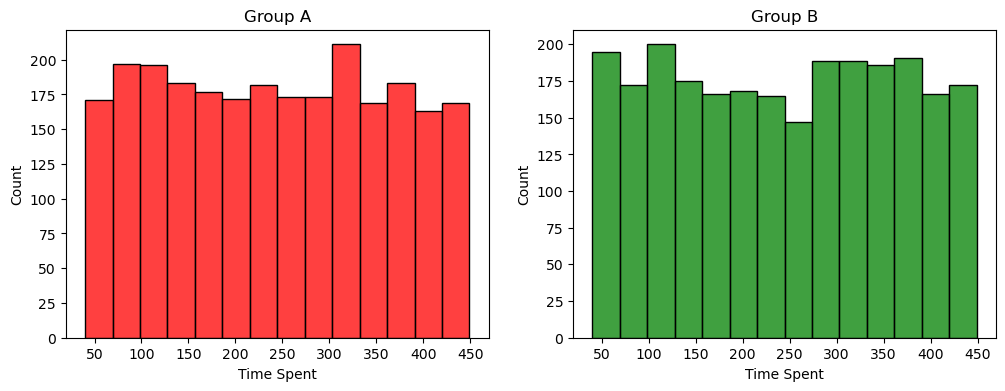

In [11]:
time_spent_A = df[df['Group']=='A']['Time Spent']
time_spent_B = df[df['Group']=='B']['Time Spent']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

sns.histplot(time_spent_A, color='red', ax=ax1)
ax1.set_title('Group A')
ax1.set_xlabel('Time Spent')

sns.histplot(time_spent_B, color='green', ax=ax2)
ax2.set_title('Group B')
ax2.set_xlabel('Time Spent')

plt.show()

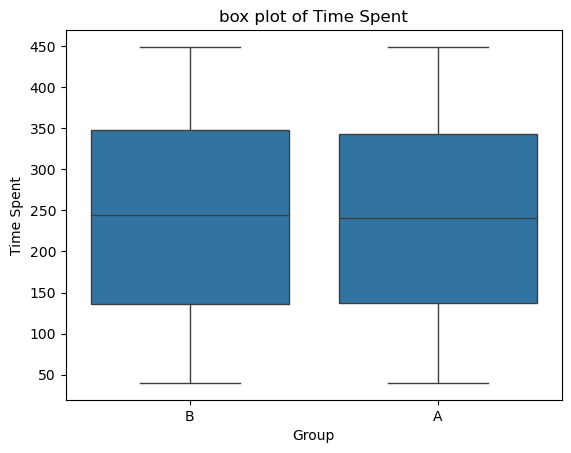

In [78]:
sns.boxplot(data = df, x = 'Group', y ='Time Spent')
plt.title('box plot of Time Spent')
plt.show()

In [95]:
print("mean time spent group A =",time_spent_A.mean())
print("mean time spent group B =", time_spent_B.mean())
print("median time spent group A =", time_spent_B.median())
print("median time spent group B =", time_spent_B.median())

mean time spent group A = 241.73322747121873
mean time spent group B = 243.30390971382508
median time spent group A = 244.0
median time spent group B = 244.0


* Видим, что среднее время проведенное пользователем на сайте в группе B не сильно превышает среднее группы А, а медиана равна. Скорее всего черный цвет фона по сравнению с белым не увеличивает существенно время, проведенное на сайте.
* Визуально кажется, что распределенния обоих групп не нормальное. Проверим нормальность с помощью теста Шапиро-Уилка, где нулевая гипотеза предпологает что данные распределенны нормальным образом. Интерпритация вывода: __p-value__ > alpha - у нас нет оснований отвергнуть нулевую гипотезу,  __p-value__ < alpha - принимает альтернативную гипотезу, что распределение не подчинено нормальному закону.

In [14]:
statistic, p_value = stats.shapiro(time_spent_A)
print("Shapiro-Wilk for A group: statistic =",statistic, "p value=", p_value)

statistic, p_value = stats.shapiro(time_spent_B)
print("Shapiro-Wilk for B group: statistic =",statistic, "p value=", p_value)

Shapiro-Wilk for A group: statistic = 0.9548671064698608 p value= 3.083246433138438e-27
Shapiro-Wilk for B group: statistic = 0.9514252794431708 p value= 6.1796874034872095e-28


В каждой из групп __p-value__ < alpha - принимаем альтернативную гипотезу. 

Используем не параметрический тест Манна-Уитни для того, чтобы обнаружить статистически занчимый эффект 

In [17]:
statistic, p_value = mannwhitneyu(time_spent_A, time_spent_B)
print("Mann-Whitney U test: statistic =", statistic, "p-value =", p_value)

Mann-Whitney U test: statistic = 3101095.0 p-value = 0.6420301034033706


__p-value__ оказался намного больше критерия 0.05 (5%), это значит, что мы не обнаружили статистически значимые различия в Time spent 

__Page views__ (количество просмотренных страниц)

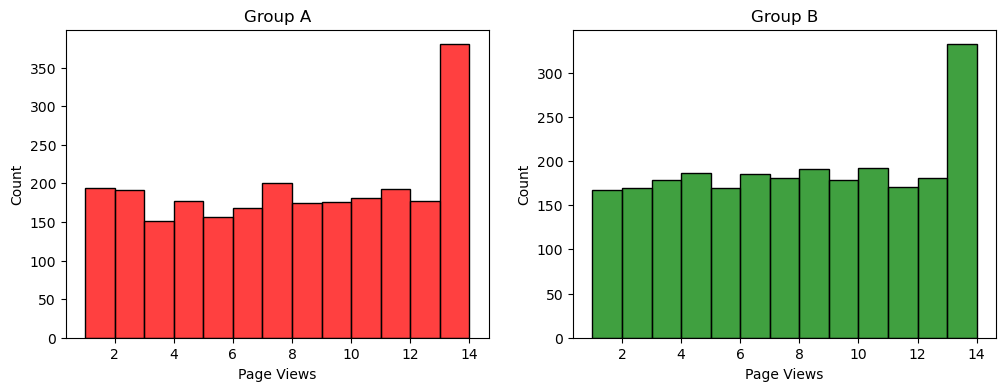

In [20]:
page_views_A = df[df['Group']=='A']['Page Views']
page_views_B = df[df['Group']=='B']['Page Views']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

sns.histplot(page_views_A, color='red', ax=ax1)
ax1.set_title('Group A')
ax1.set_xlabel('Page Views')

sns.histplot(page_views_B, color='green', ax=ax2)
ax2.set_title('Group B')
ax2.set_xlabel('Page Views')

plt.show()

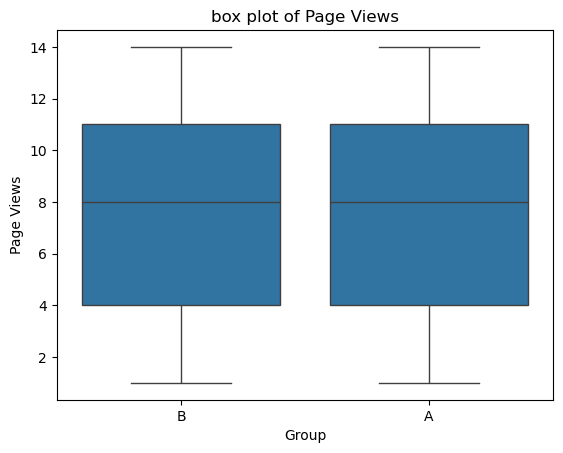

In [80]:
sns.boxplot(data = df, x = 'Group', y = 'Page Views');
plt.title('box plot of Page Views')
plt.show()

In [90]:
print("mean page views group A =", page_views_A.mean())
print("mean page views group B =", page_views_B.mean())
print("median page views group A =", page_views_B.median())
print("median page views group B =", page_views_B.median())

mean page views group A = 7.581579992060341
mean page views group B = 7.492946392583636
median page views group A = 8.0
median page views group B = 8.0


* В группе А среднее значение в page views немного больше чем в группе В, a медианное значение одинаково. Это говорит, о том, что отличий в А и В дизайне по отношению к количеству просморенных страниц скорее всего нет или они являются не существенными.
* Проверим распределение на нормальность с помощью теста Шапиро-Уилка

In [23]:
statistic, p_value = stats.shapiro(page_views_A)
print("Shapiro-Wilk for group A: statistic =", statistic, "p value =", p_value)
statistic, p_value = stats.shapiro(page_views_B)
print("Shapiro-Wilk for group B: statistic =", statistic, "p value =", p_value)

Shapiro-Wilk for group A: statistic = 0.9418101396339102 p value = 2.137180781669329e-30
Shapiro-Wilk for group B: statistic = 0.9481565533306111 p value = 9.739883236584908e-29


Значение обеих групп __p-value__ < alpha - распределения групп А и В не нормально.

Используем не параметрический тест Манна-Уитни для того, чтобы обнаружить статистически занчимый эффект 

In [26]:
statistic, p_value = mannwhitneyu(page_views_A, page_views_B)
print("Mann-Whitney U test: statistic =", statistic, "p-value =", p_value)

Mann-Whitney U test: statistic = 3165458.0 p-value = 0.42467839841511335


__p-value__ > 0.05 - Статистически значимого различия в группах не обнаруженно 

__Conversion__ 

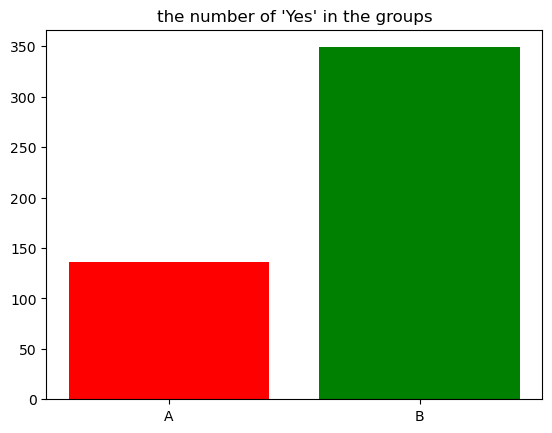

In [29]:
# посчитаем количество "Yes" в конверсии
counts_Yes = df.groupby('Group')['Conversion'].apply(lambda x: (x == 'Yes').sum()).reset_index(name = 'Yes')
plt.bar(counts_Yes['Group'], counts_Yes['Yes'], color = ['red', 'green'])
plt.title("the number of 'Yes' in the groups");

* Видим, что в группе В конверсия намного больше чем в группе А
* Проведем тест хи квадрат для оценки двух категориальных переменных

In [31]:
# создаем таблицу сопряженности 
contingency_table = pd.crosstab(df['Group'], df['Conversion'])

# Проводим тест хи-квадрат
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("chi square test: statistic =", chi2, "p value =", p)

chi square test: statistic = 106.22812337440538 p value = 6.571736018334222e-25


__p-value__ < 0.05. Мы получили очень малую вероятность, что такие различия полученны случайно, это позволяет с высокой степенью уверенности отклонить нулевую гипотезу о независимости переменных и считать что дизайн группы В эффективнее в плане конверсии 

In [33]:
# рассчитаем коэффициент конверсии
counts_conversion = df.groupby('Group')['Conversion'].count().reset_index(name = 'count')
counts_conversion['count'] = counts_Yes['Yes']/counts_conversion['count']*100
cr = counts_conversion
cr

,Group,count
0,A,5.398968
1,B,14.066909


In [34]:
counts_conversion = df.groupby('Group')['Conversion'].count().reset_index(name = 'count')
counts_conversion

,Group,count
0,A,2519
1,B,2481


In [35]:
counts_Yes

,Group,Yes
0,A,136
1,B,349


CR группы B в 2.6 раза больше группы А

Посмотрим как количество совершенных конверсий в группах А и В выглядит на графике более детально, с учетом стран и типом устройств.

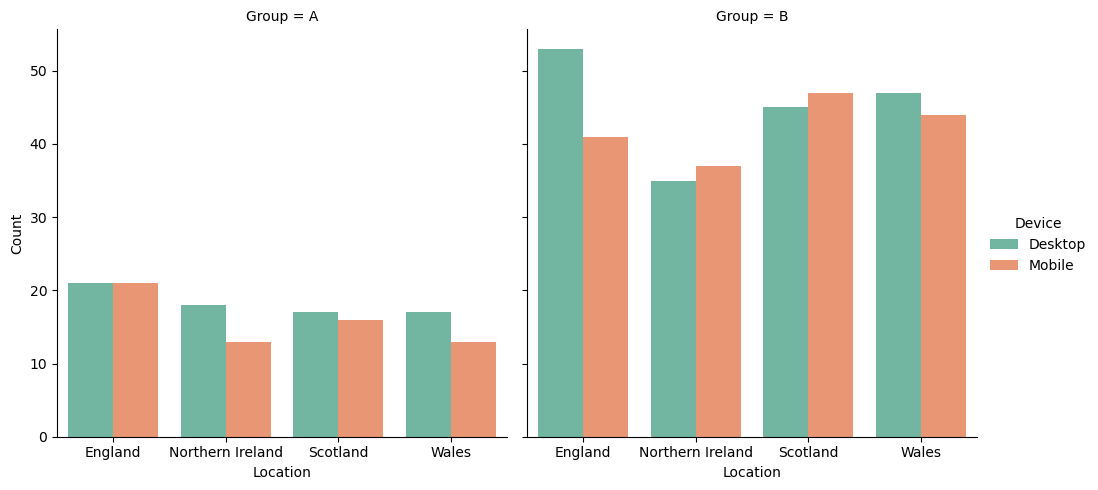

In [38]:
df['Conversion'] = df['Conversion'].replace(['Yes','No'],['1', '0']).astype(int)
grouped_values = df.groupby(['Group', 'Device', 'Location'])['Conversion'].sum().reset_index(name='Count')
figure = sns.catplot(data= grouped_values, x="Location", y="Count", hue="Device", kind="bar", col="Group", palette="Set2")

Группа В польностю превосходит А по всем отношениям.

__Вывод:__ Анализ времени, проведенного на сайте и количество просмотренных страниц не показало статистически значимого различия между черным фоном и белым фоном сайта. Анализ конверсии показал статистически значимое увеличение в группе B (черный фон сайта). Это ключевой положительный результат, который говорит об эффективности нового дизайна в достижении основной цели — увеличения конверсии. Детальный анализ конверсии с разбивкой по странам и устройствам показал, что новый дизайн положительно повлиял на конверсию во всех странах и на всех типах устройств.
Такой результат может быть связано с тем, что новый дизайн, возможно, более эффективно направляет пользователей к целевому действию, даже если они проводят на сайте меньше времени и просматривают меньше страниц.